#                                Insights from relationships in data set

--------------------------------------------------------------------------------------------------------------------------------------------------------

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from scipy.stats import zscore
from matplotlib.cbook import boxplot_stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
linreg=LinearRegression()
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Importing datasets separated by Brand category and numerical values + original dataset
highstreetnum = pd.read_csv('highstreetnum.csv')
megacouturenum = pd.read_csv('megacouturenum.csv')
designernum = pd.read_csv('designernum.csv')
smallcouturenum = pd.read_csv('smallcouturenum.csv')

----

## High Street Relationships

Brands in high street brand category showed a stronger correlation with Followers (number of followers),  Comments (number of comments), and Outdoor (Images taken outside or where the background is outside). Now, we explore those relationships by analyzing their correlations and using the strongest correlating variable i.e. Followers as a predictor to build a linear regression model with Likes as a response variable.

### Followers and High Street

In [3]:
followerslikes = pd.concat([highstreetnum['Followers'], highstreetnum['Likes']], axis = 1).reindex(highstreetnum['Followers'].index)
print("No of values and columns for the joint dataframe of followers and high street :", followerslikes.shape)

No of values and columns for the joint dataframe of followers and high street : (5773, 2)


In [4]:
followerslikes.corr()

,Followers,Likes
Followers,1.000000,0.643606
Likes,0.643606,1.000000


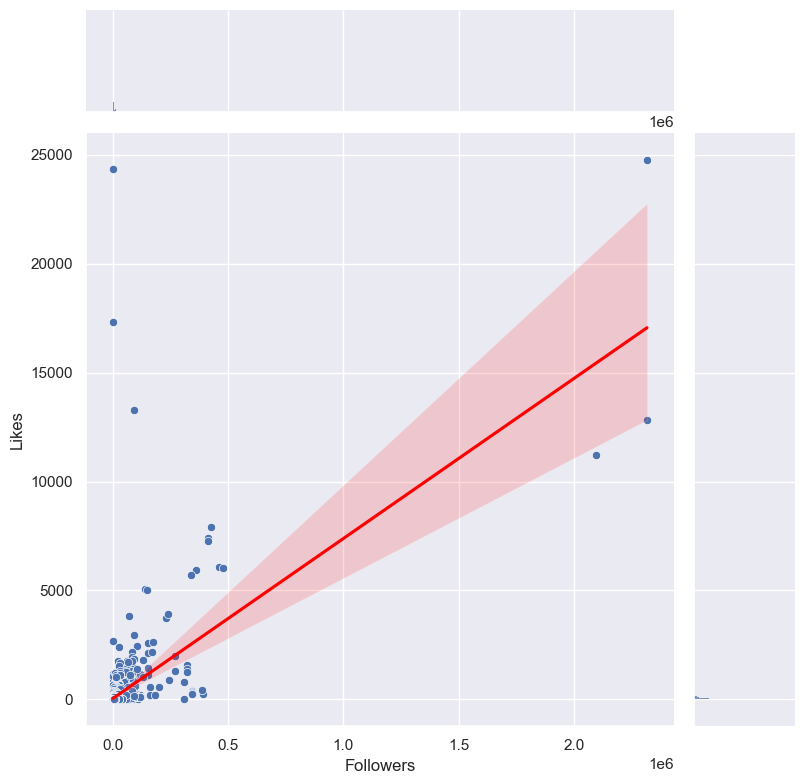

In [5]:
followerslikesjp = sb.jointplot(data=followerslikes, x="Followers", y="Likes", height=8)
sb.regplot(data=followerslikes, x="Followers", y="Likes", scatter=False, ax=followerslikesjp.ax_joint, color='red')
plt.show()

With a correlation of 0.643, Followers has the strongest positive correlation with High Street proving when compared to all other variables, it can be a reliable predictor of which posts receive more likes 

### Comments and High Street

In [6]:
commentslikes = pd.concat([highstreetnum['Comments '], highstreetnum['Likes']], axis = 1).reindex(highstreetnum['Comments '].index)
print("No of values and columns for the joint dataframe of comments and high street :", commentslikes.shape)

No of values and columns for the joint dataframe of comments and high street : (5773, 2)


In [7]:
commentslikes.corr()

,Comments,Likes
Comments,1.00000,0.58335
Likes,0.58335,1.00000


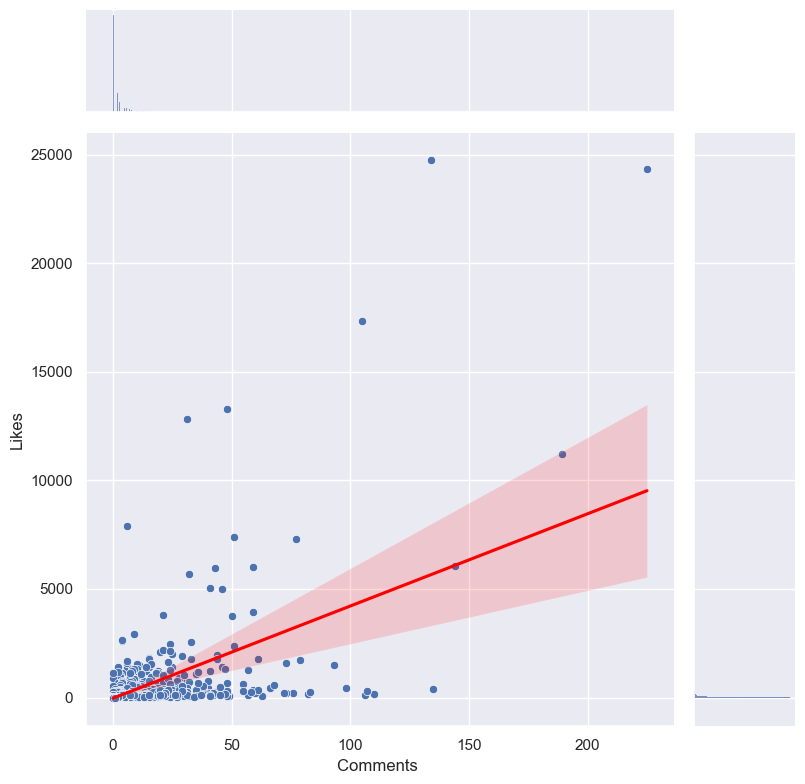

In [8]:
commentslikesjp = sb.jointplot(data=commentslikes, x="Comments ", y="Likes", height=8)
sb.regplot(data=commentslikes, x="Comments ", y="Likes", scatter=False, ax=commentslikesjp.ax_joint, color='red')
plt.show()

With a correlation of 0.583, Comments has the second strongest positive correlation with High Street proving it can be a predictor of which posts receive more likes

## Multiple Linear Regression Model for Followers and Comments (High Street)

We use the two most strongly correlated variables - Followers & Comments - to plot a multiple linear regression model using Likes as a response variable and split it into sets of train and test datasets & tabulate values to determine the accuracy of our model

In [10]:
X = highstreetnum[["Followers", "Comments "]]
y = highstreetnum["Likes"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linreg.fit(X_train,y_train)

print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (4618, 2) (4618,)
Test set: (1155, 2) (1155,)


In [11]:
print("Coefficients:a=",linreg.coef_)
print("Intercept:b=",linreg.intercept_)

Coefficients:a= [6.80121014e-03 1.83384452e+01]
Intercept:b= -18.036528045440065


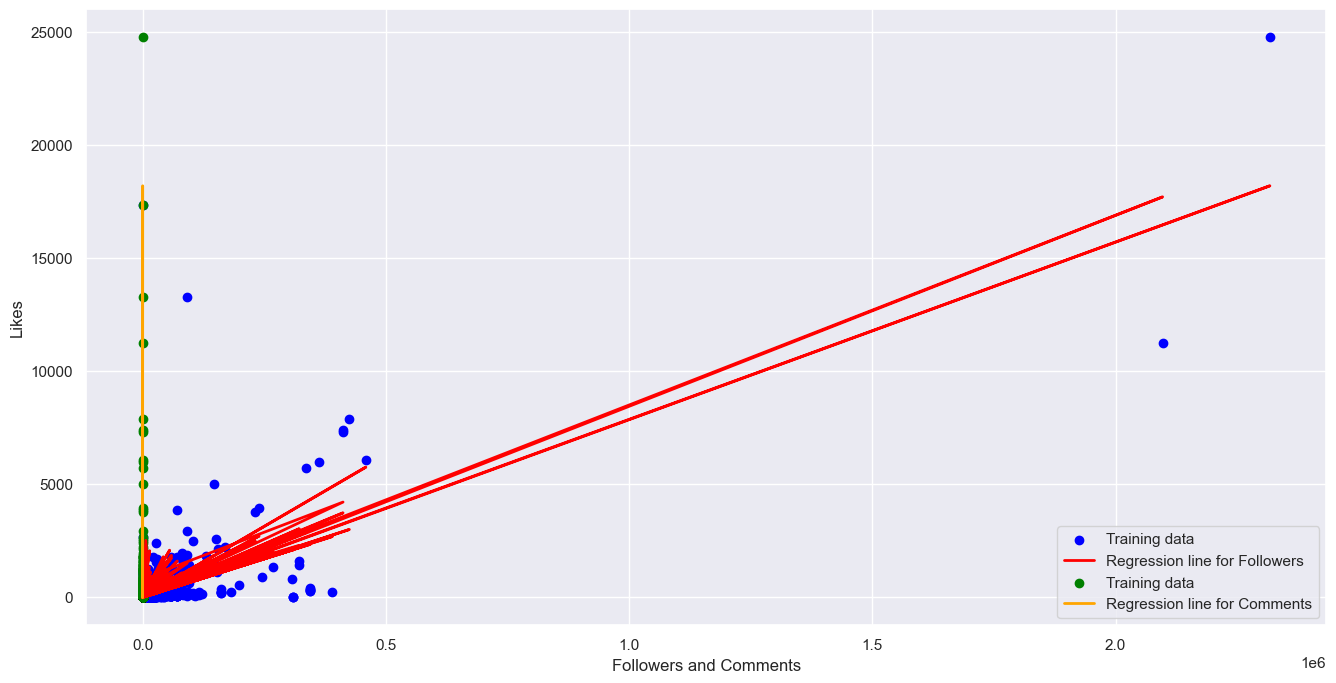

In [12]:
plt.figure(figsize=(16,8))
plt.scatter(X_train["Followers"], y_train, color='blue', label='Training data')
plt.plot(X_train["Followers"], linreg.predict(X_train), color='red', linewidth=2, label='Regression line for Followers')
plt.scatter(X_train["Comments "], y_train, color='green', label='Training data')
plt.plot(X_train["Comments "], linreg.predict(X_train), color='orange', linewidth=2, label='Regression line for Comments')
plt.xlabel('Followers and Comments')
plt.ylabel('Likes')
plt.legend()
plt.show()

In [13]:
y_train_predict = linreg.predict(X_train)
y_test_predict = linreg.predict(X_test)
print("Goodness of Fit of Model: Train Dataset")
print("Explained variance R^2:", linreg.score(X_train, y_train))
print("Mean squared error MSE:", mean_squared_error(y_train, y_train_predict))
print("Root Mean Squared Error RMSE:", np.sqrt(mean_squared_error(y_train, y_train_predict)))
print()

Goodness of Fit of Model: Train Dataset
Explained variance R^2: 0.578473483383182
Mean squared error MSE: 155275.62420318119
Root Mean Squared Error RMSE: 394.0502813134146



In [14]:
print("Goodness of Fit of Model: Test Dataset")
print("Explained variance R^2:", linreg.score(X_test, y_test))
print("Mean squared error MSE:", mean_squared_error(y_test, y_test_predict))
print("Root Mean Squared Error RMSE:", np.sqrt(mean_squared_error(y_test, y_test_predict)))
print()

Goodness of Fit of Model: Test Dataset
Explained variance R^2: 0.4474047498004078
Mean squared error MSE: 407112.9117904791
Root Mean Squared Error RMSE: 638.0540038198013



Disparity in explained variance R^2 between train and test datasets is slight, but may prove our model is overfitting but our train dataset explains about 58% of the variance in Likes which proves the strength of Followers as a predictor. In order to combat the overfitting, we will be trying methods to improve these values.

----

## Designer Relationships

Brands in designer brand category showed a stronger correlation with Followers (number of followers) and Comments (number of comments) while other variables where significantly lower (<0.1) hence proving how reltionships with brands in designer brand category may either vary more and rely heavily on fewer variables. Now, we explore those relationships by analyzing their correlations and using the strongest correlating variable i.e. Followers as a predictor to build a linear regression model with Likes as a response variable.

### Followers and Designer

In [15]:
designer_followerslikes = pd.concat([designernum['Followers'], designernum['Likes']], axis = 1).reindex(designernum['Followers'].index)
print("No of values and columns for the joint dataframe of followers and high street :", designer_followerslikes.shape)

No of values and columns for the joint dataframe of followers and high street : (11086, 2)


In [16]:
designer_followerslikes.corr()

,Followers,Likes
Followers,1.000000,0.701463
Likes,0.701463,1.000000


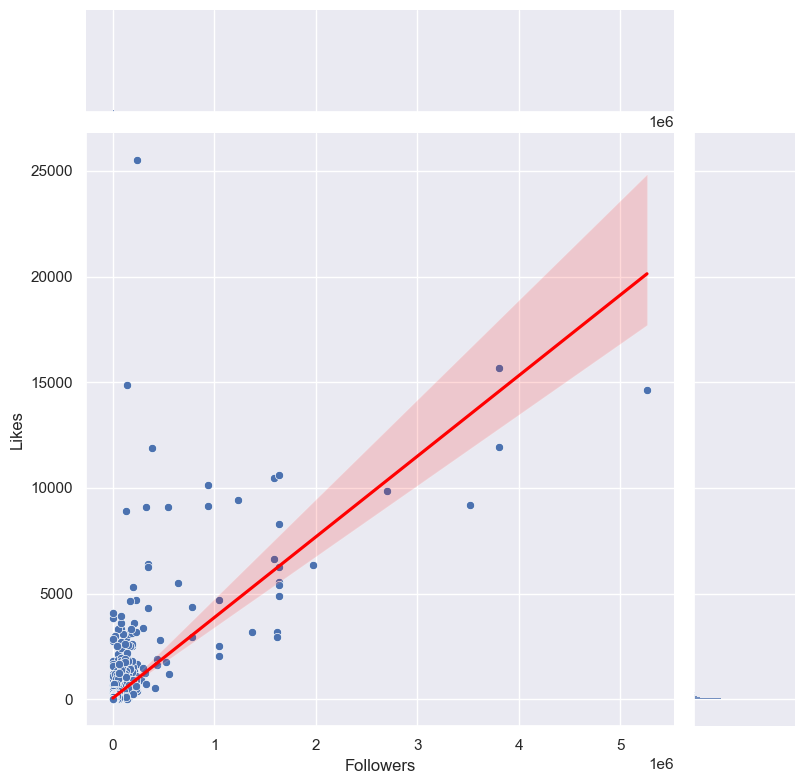

In [17]:
designer_followerslikesjp = sb.jointplot(data=designer_followerslikes, x="Followers", y="Likes", height=8)
sb.regplot(data=designer_followerslikes, x="Followers", y="Likes", scatter=False, ax=designer_followerslikesjp.ax_joint, color='red')
plt.show()

With a correlation of 0.701, Followers has the strongest positive correlation with Likes in Designer brand category proving when compared to all other variables, it can be a reliable predictor of which posts receive more likes. It's correlation with likes is even stronger than that of the brand category High Street further strengthening the earlier deduction made.

### Comments and Designer

In [18]:
designer_commentslikes = pd.concat([designernum['Comments '], designernum['Likes']], axis = 1).reindex(designernum['Comments '].index)
print("No of values and columns for the joint dataframe of comments and designer :", designer_commentslikes.shape)

No of values and columns for the joint dataframe of comments and designer : (11086, 2)


In [19]:
designer_commentslikes.corr()

,Comments,Likes
Comments,1.000000,0.412699
Likes,0.412699,1.000000


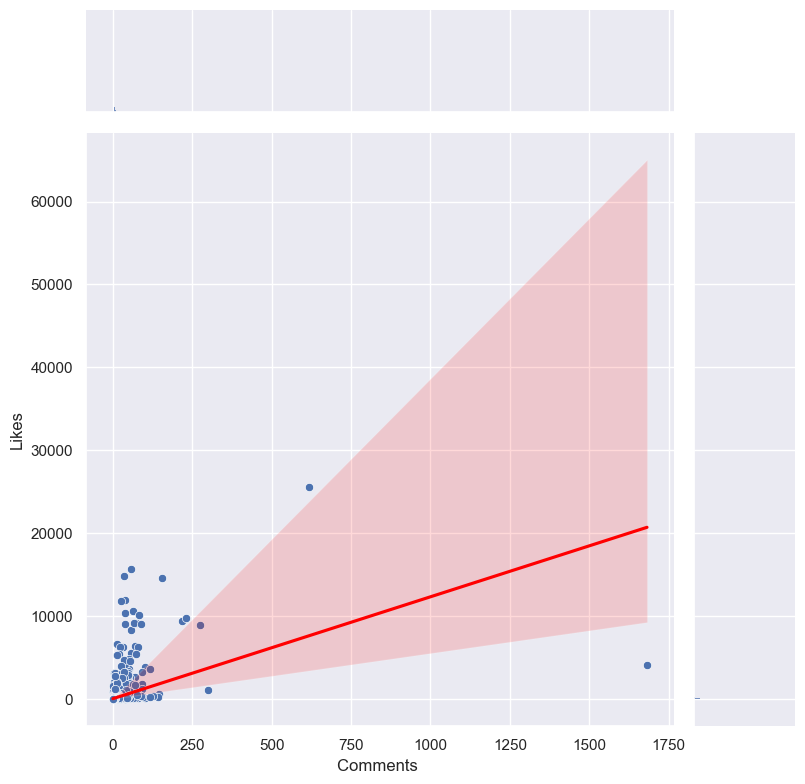

In [20]:
designer_commentslikesjp = sb.jointplot(data=designer_commentslikes, x="Comments ", y="Likes", height=8)
sb.regplot(data=designer_commentslikes, x="Comments ", y="Likes", scatter=False, ax=designer_commentslikesjp.ax_joint, color='red')
plt.show()

With a correlation of 0.583, Comments has the second strongest positive correlation with designer proving it can be a predictor of which posts receive more likes. However, it's correlation with likes is even weaker than that of the brand category High Street proving Designer brands seem skew heavily on Followers instead of any other variable.

## Multiple Linear Regression Model for Followers and Comments (Designer)

We use the two most strongly correlated variables - Followers & Comments - to plot a multiple linear regression model using Likes as a response variable and split it into sets of train and test datasets & tabulate values to determine the accuracy of our model

In [21]:
X = designernum[["Followers", "Comments "]]
y = designernum["Likes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (8868, 2) (8868,)
Test set: (2218, 2) (2218,)


In [22]:
print("Coefficients:a=",linreg.coef_)
print("Intercept:b=",linreg.intercept_)

Coefficients:a= [6.80121014e-03 1.83384452e+01]
Intercept:b= -18.036528045440065


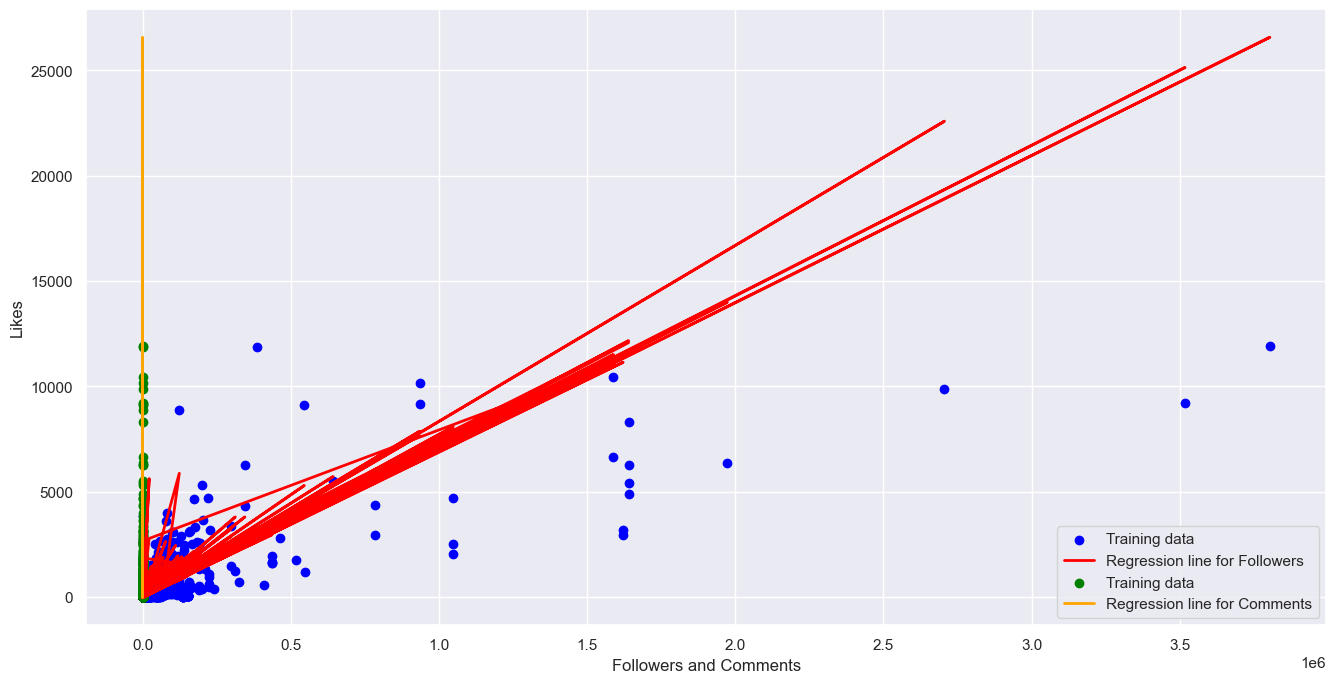

In [23]:
plt.figure(figsize=(16,8))
plt.scatter(X_train["Followers"], y_train, color='blue', label='Training data')
plt.plot(X_train["Followers"], linreg.predict(X_train), color='red', linewidth=2, label='Regression line for Followers')
plt.scatter(X_train["Comments "], y_train, color='green', label='Training data')
plt.plot(X_train["Comments "], linreg.predict(X_train), color='orange', linewidth=2, label='Regression line for Comments')
plt.xlabel('Followers and Comments')
plt.ylabel('Likes')
plt.legend()
plt.show()

In [24]:
y_train_predict = linreg.predict(X_train)
y_test_predict = linreg.predict(X_test)
print("Goodness of Fit of Model: Train Dataset")
print("Explained variance R^2:", linreg.score(X_train, y_train))
print("Mean squared error MSE:", mean_squared_error(y_train, y_train_predict))
print("Root Mean Squared Error RMSE:", np.sqrt(mean_squared_error(y_train, y_train_predict)))
print()

Goodness of Fit of Model: Train Dataset
Explained variance R^2: 0.18673907070807305
Mean squared error MSE: 169197.57358852075
Root Mean Squared Error RMSE: 411.336326609407



In [25]:
print("Goodness of Fit of Model: Test Dataset")
print("Explained variance R^2:", linreg.score(X_test, y_test))
print("Mean squared error MSE:", mean_squared_error(y_test, y_test_predict))
print("Root Mean Squared Error RMSE:", np.sqrt(mean_squared_error(y_test, y_test_predict)))
print()

Goodness of Fit of Model: Test Dataset
Explained variance R^2: -0.08614233379392111
Mean squared error MSE: 879648.207027301
Root Mean Squared Error RMSE: 937.8956269368681



Negative R^2 values is a sign of overfitting on our multiple linear regression model for Followers and Comments in the Designer brand category - hence we will attempt other methods to fix overfitting at the end of this notebook.

----

## Small Couture Relationships

Brands in Small Couture brand category followed the trend of other brand catgories with a strong correlations with Followers (number of followers) and Comments (number of comments) while other variables where significantly lower (<0.1). Now, we explore those relationships by analyzing their correlations and using the strongest correlating variable i.e. Followers as a predictor to build a linear regression model with Likes as a response variable.

### Followers and Small Couture

In [26]:
smallcouture_followerslikes = pd.concat([smallcouturenum['Followers'], smallcouturenum['Likes']], axis = 1).reindex(smallcouturenum['Followers'].index)
print("No of values and columns for the joint dataframe of followers and small couture :", smallcouture_followerslikes.shape)

No of values and columns for the joint dataframe of followers and small couture : (6036, 2)


In [27]:
smallcouture_followerslikes.corr()

,Followers,Likes
Followers,1.000000,0.946084
Likes,0.946084,1.000000


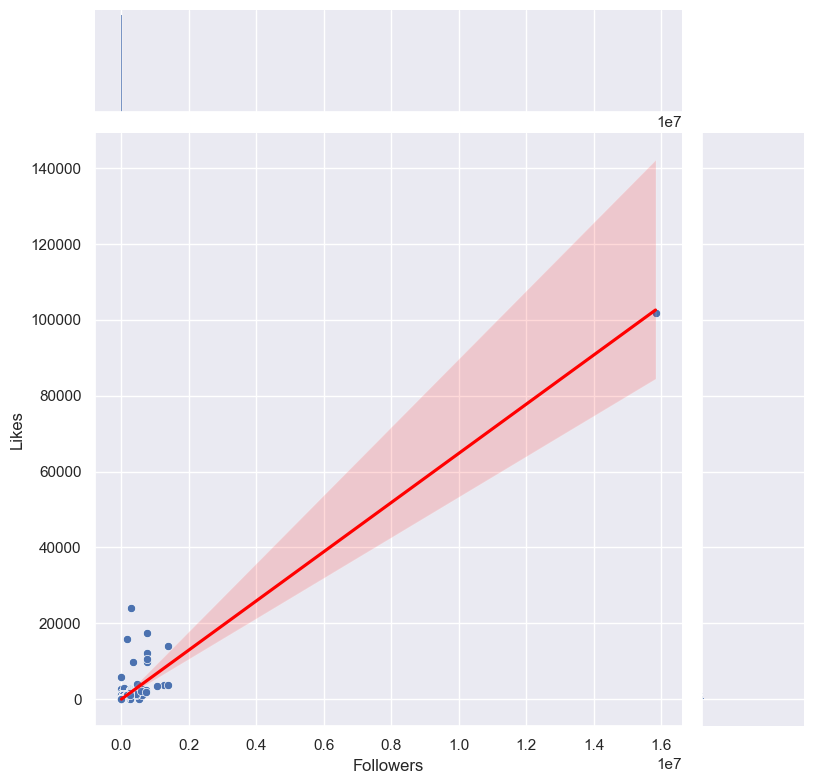

In [28]:
smallcouture_followerslikesjp = sb.jointplot(data=smallcouture_followerslikes, x="Followers", y="Likes", height=8)
sb.regplot(data=smallcouture_followerslikes, x="Followers", y="Likes", scatter=False, ax=smallcouture_followerslikesjp.ax_joint, color='red')
plt.show()

With a correlation of 0.946, this is the strongest positive correlation Followers has with Likes in any brand category - it implies that for small couture, the best preidctor in post popularity may be Followers than any other variable since it's almost close to a perfect positive correlation. However, there may be other factors we will be acknowledging in succeeding data analyses.

### Comments and Small Couture

In [29]:
smallcouture_commentslikes = pd.concat([smallcouturenum['Comments '], smallcouturenum['Likes']], axis = 1).reindex(smallcouturenum['Comments '].index)
print("No of values and columns for the joint dataframe of comments and small couture :", smallcouture_commentslikes.shape)

No of values and columns for the joint dataframe of comments and small couture : (6036, 2)


In [30]:
smallcouture_commentslikes.corr()

,Comments,Likes
Comments,1.000000,0.689398
Likes,0.689398,1.000000


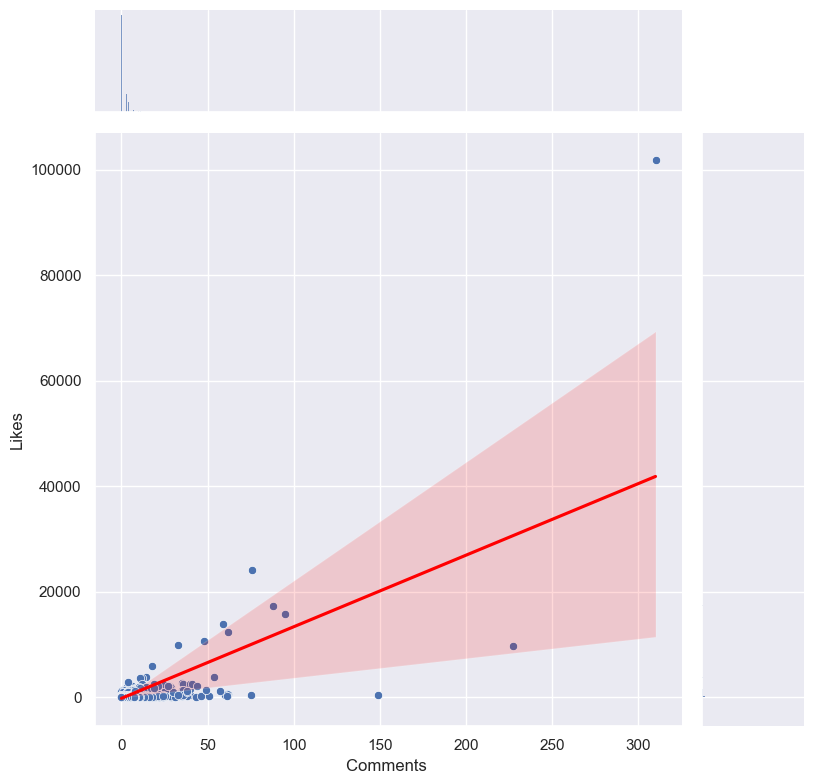

In [31]:
smallcouture_commentslikesjp = sb.jointplot(data=smallcouture_commentslikes, x="Comments ", y="Likes", height=8)
sb.regplot(data=smallcouture_commentslikes, x="Comments ", y="Likes", scatter=False, ax=smallcouture_commentslikesjp.ax_joint, color='red')
plt.show()

With a correlation of 0.689, Comments has a subsequently weaker positive correlation with Likes in Small Couture than Followers but individually, it can be a reliable predictor of which posts receive more likes. 

## Multiple Linear Regression Model for Followers and Comments (Small Couture)

We use the two most strongly correlated variables - Followers & Comments - to plot a multiple linear regression model using Likes as a response variable and split it into sets of train and test datasets & tabulate values to determine the accuracy of our model

In [32]:
X = smallcouturenum[["Followers", "Comments "]]
y = smallcouturenum["Likes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (4828, 2) (4828,)
Test set: (1208, 2) (1208,)


In [33]:
print("Coefficients:a=",linreg.coef_)
print("Intercept:b=",linreg.intercept_)

Coefficients:a= [6.80121014e-03 1.83384452e+01]
Intercept:b= -18.036528045440065


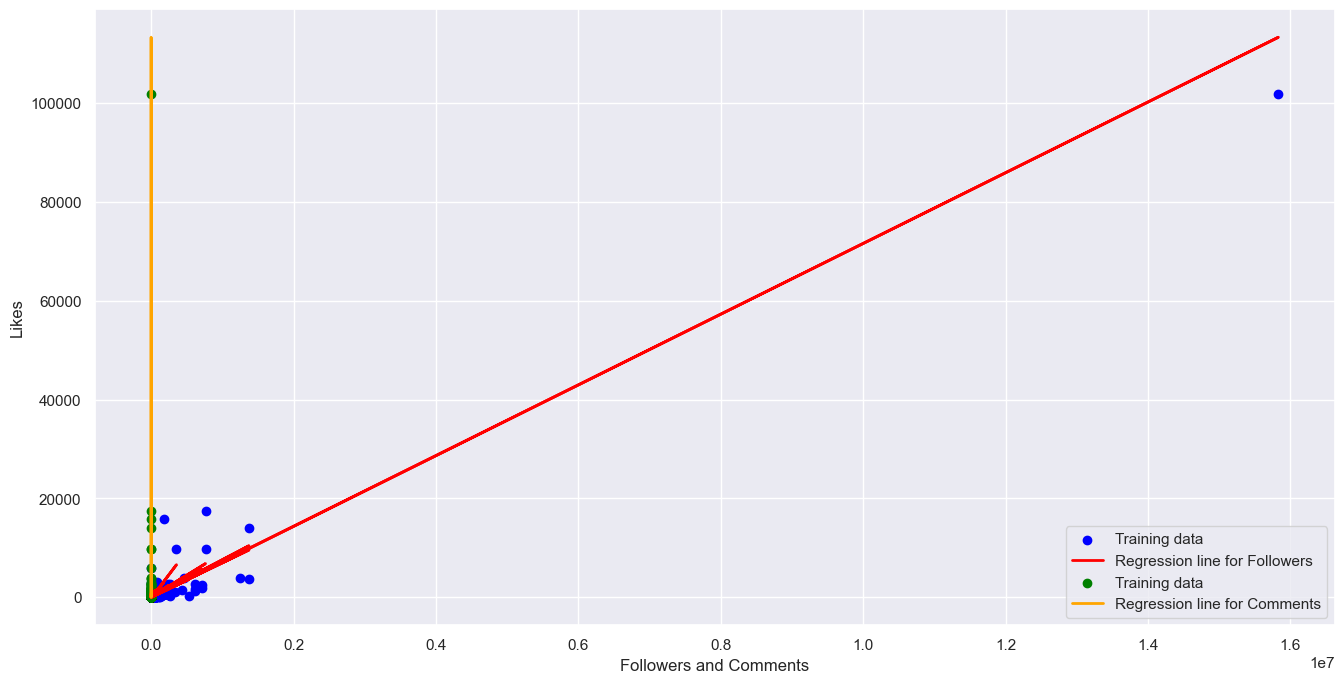

In [34]:
plt.figure(figsize=(16,8))
plt.scatter(X_train["Followers"], y_train, color='blue', label='Training data')
plt.plot(X_train["Followers"], linreg.predict(X_train), color='red', linewidth=2, label='Regression line for Followers')
plt.scatter(X_train["Comments "], y_train, color='green', label='Training data')
plt.plot(X_train["Comments "], linreg.predict(X_train), color='orange', linewidth=2, label='Regression line for Comments')
plt.xlabel('Followers and Comments')
plt.ylabel('Likes')
plt.legend()
plt.show()

In [35]:
y_train_predict = linreg.predict(X_train)
y_test_predict = linreg.predict(X_test)
print("Goodness of Fit of Model: Train Dataset")
print("Explained variance R^2:", linreg.score(X_train, y_train))
print("Mean squared error MSE:", mean_squared_error(y_train, y_train_predict))
print("Root Mean Squared Error RMSE:", np.sqrt(mean_squared_error(y_train, y_train_predict)))
print()

Goodness of Fit of Model: Train Dataset
Explained variance R^2: 0.9404734490212708
Mean squared error MSE: 142987.4627632249
Root Mean Squared Error RMSE: 378.1368307414988



In [36]:
print("Goodness of Fit of Model: Test Dataset")
print("Explained variance R^2:", linreg.score(X_test, y_test))
print("Mean squared error MSE:", mean_squared_error(y_test, y_test_predict))
print("Root Mean Squared Error RMSE:", np.sqrt(mean_squared_error(y_test, y_test_predict)))
print()

Goodness of Fit of Model: Test Dataset
Explained variance R^2: 0.40414182908637275
Mean squared error MSE: 445847.9276969914
Root Mean Squared Error RMSE: 667.7184494208553



There is a rather substantial disparity in the R^2 values of train and test datasets, indicating possible overfitting in the linear regression model - we will tackle this using alternate linear regression models at the end of this notebook. However, on a more positive note, the model explain about 94% of variance in the train dataset, proving the robustness of the relationshsip between Followers and Likes in Small Couture

----

## Mega Couture Relationships

Brands in Mega Couture brand category also showed a stronger correlation with Followers (number of followers) and Comments (number of comments) while other variables where significantly lower (<0.1) hence further demonstrating the strength of Followers and Comments as predictor variables. Now, we explore those relationships by analyzing their correlations and using the strongest correlating variable i.e. Followers as a predictor to build a linear regression model with Likes as a response variable.

### Followers and Mega Couture

In [37]:
megacouture_followerslikes = pd.concat([megacouturenum['Followers'], megacouturenum['Likes']], axis = 1).reindex(megacouturenum['Followers'].index)
print("No of values and columns for the joint dataframe of followers and mega couture :", megacouture_followerslikes.shape)

No of values and columns for the joint dataframe of followers and mega couture : (1857, 2)


In [38]:
megacouture_followerslikes.corr()

,Followers,Likes
Followers,1.000000,0.678127
Likes,0.678127,1.000000


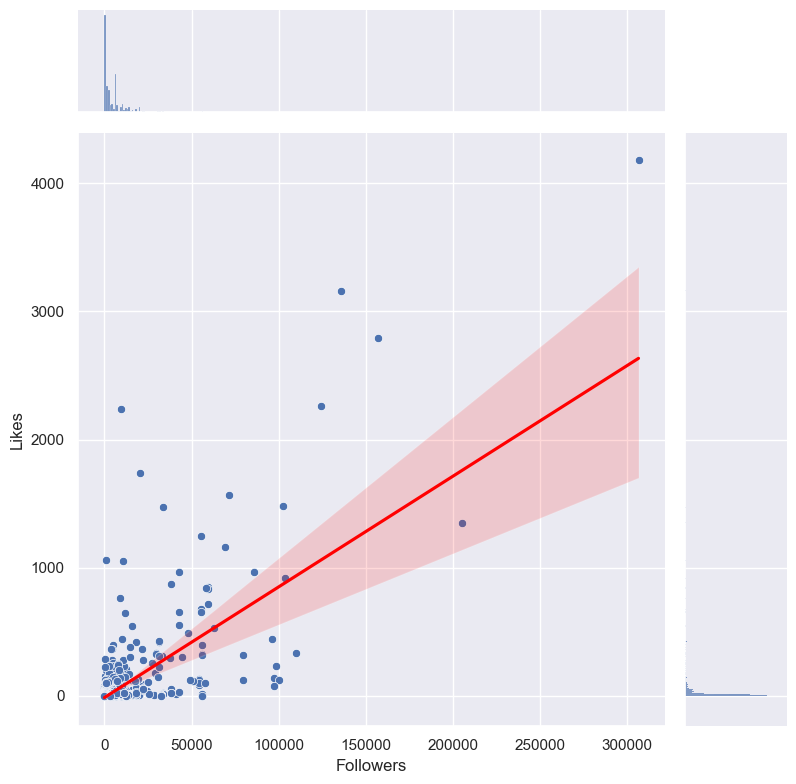

In [39]:
megacouture_followerslikesjp = sb.jointplot(data=megacouture_followerslikes, x="Followers", y="Likes", height=8)
sb.regplot(data=megacouture_followerslikes, x="Followers", y="Likes", scatter=False, ax=megacouture_followerslikesjp.ax_joint, color='red')
plt.show()

With a correlation of 0.678, Followers has a strong positive correlation with Likes in the Mega Couture brand category proving it's worth as a worthy predictor for Likes. Its correlation with Likes however, is still lower than some other categories implying it has less weight in prediction than other brand categories.

### Comments and Mega Couture

In [40]:
megacouture_commentslikes = pd.concat([megacouturenum['Comments '], megacouturenum['Likes']], axis = 1).reindex(megacouturenum['Comments '].index)
print("No of values and columns for the joint dataframe of comments and mega couture :", megacouture_commentslikes.shape)

No of values and columns for the joint dataframe of comments and mega couture : (1857, 2)


In [41]:
megacouture_commentslikes.corr()

,Comments,Likes
Comments,1.000000,0.588612
Likes,0.588612,1.000000


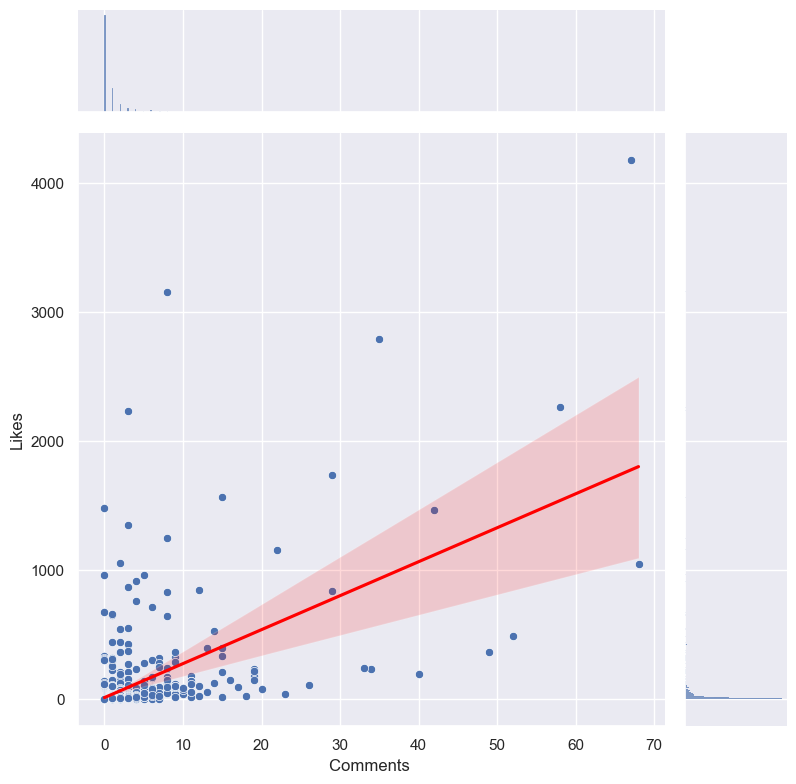

In [42]:
megacouture_commentslikesjp = sb.jointplot(data=megacouture_commentslikes, x="Comments ", y="Likes", height=8)
sb.regplot(data=megacouture_commentslikes, x="Comments ", y="Likes", scatter=False, ax=megacouture_commentslikesjp.ax_joint, color='red')
plt.show()

With a correlation of 0.589, Comments has the second strongest positive correlation with designer, implying it has substantial weight in predicting post popularity and Likes in Mega Couture brand category. 

## Multiple Linear Regression Model for Followers and Comments (Mega Couture)

We use the two most strongly correlated variables - Followers & Comments - to plot a multiple linear regression model using Likes as a response variable and split it into sets of train and test datasets & tabulate values to determine the accuracy of our model

In [43]:
X = megacouturenum[["Followers", "Comments "]]
y = megacouturenum["Likes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (1485, 2) (1485,)
Test set: (372, 2) (372,)


In [44]:
print("Coefficients:a=",linreg.coef_)
print("Intercept:b=",linreg.intercept_)

Coefficients:a= [6.80121014e-03 1.83384452e+01]
Intercept:b= -18.036528045440065


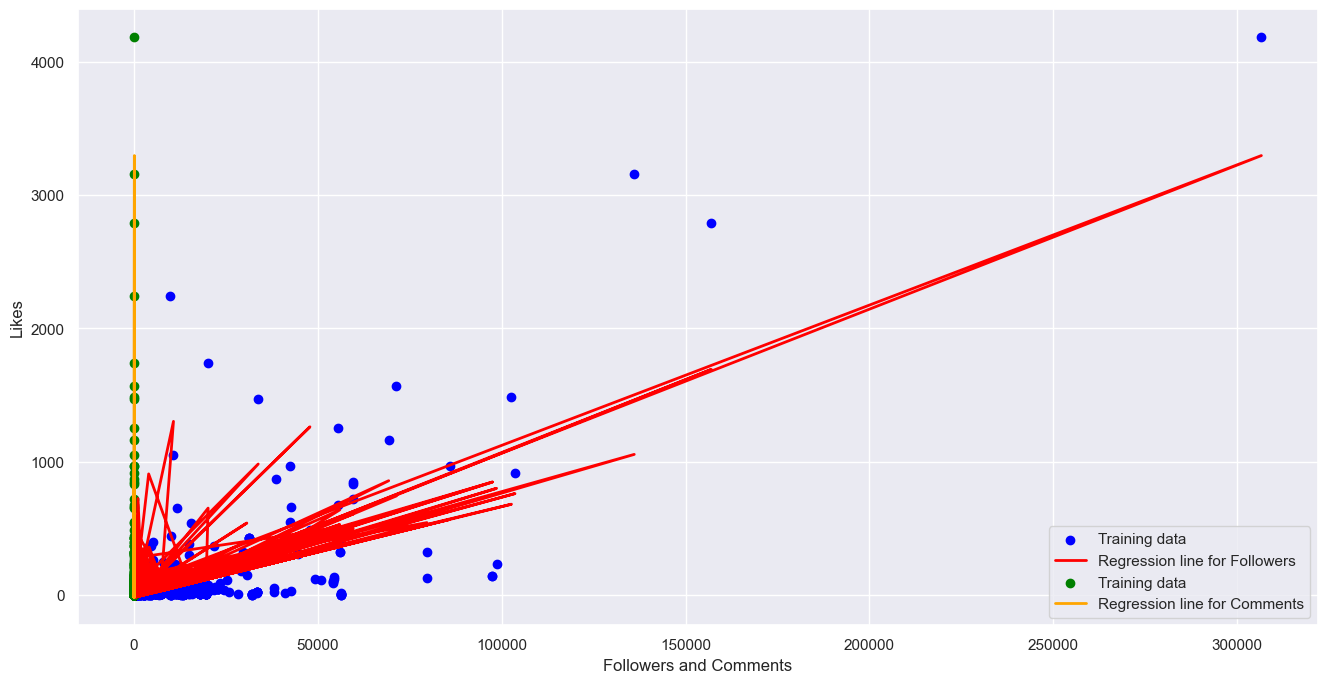

In [45]:
plt.figure(figsize=(16,8))
plt.scatter(X_train["Followers"], y_train, color='blue', label='Training data')
plt.plot(X_train["Followers"], linreg.predict(X_train), color='red', linewidth=2, label='Regression line for Followers')
plt.scatter(X_train["Comments "], y_train, color='green', label='Training data')
plt.plot(X_train["Comments "], linreg.predict(X_train), color='orange', linewidth=2, label='Regression line for Comments')
plt.xlabel('Followers and Comments')
plt.ylabel('Likes')
plt.legend()
plt.show()

In [46]:
y_train_predict = linreg.predict(X_train)
y_test_predict = linreg.predict(X_test)
print("Goodness of Fit of Model: Train Dataset")
print("Explained variance R^2:", linreg.score(X_train, y_train))
print("Mean squared error MSE:", mean_squared_error(y_train, y_train_predict))
print("Root Mean Squared Error RMSE:", np.sqrt(mean_squared_error(y_train, y_train_predict)))
print()

Goodness of Fit of Model: Train Dataset
Explained variance R^2: 0.6046820470298457
Mean squared error MSE: 16843.96073981617
Root Mean Squared Error RMSE: 129.78428541166366



In [47]:
print("Goodness of Fit of Model: Test Dataset")
print("Explained variance R^2:", linreg.score(X_test, y_test))
print("Mean squared error MSE:", mean_squared_error(y_test, y_test_predict))
print("Root Mean Squared Error RMSE:", np.sqrt(mean_squared_error(y_test, y_test_predict)))
print()

Goodness of Fit of Model: Test Dataset
Explained variance R^2: 0.47552076797088494
Mean squared error MSE: 15063.028819617482
Root Mean Squared Error RMSE: 122.73153148077914



The disparity between R^2 values is less for the linear regression model for Followers and Likes but the model explains about 60% of the variance in the train dataset. Hence, we will attempt alternate methods to improve our values at the end of this notebook.

---

## Ridge & Lasso Regression Models to improve our previous Linear Regression Models

To improve our linear regression models, we've used two different kinds of model: Ridge & Lasso Regression. RIdge regression model are linear regression models that reduce overfitting by discouraging large coefficients and ensure noise in the data doesn't affect the model's final results. Lasso regression models are similar but they use a different kind of penalty to discourage large coefficients. Hence, we execute these 2 models separately on Followers and Comments to improve the predictions.

### Ridge Regression Models

Here, we execute a ridge regression model for Followers and Likes for each brand category


Brand category: High street
Predictors used for High street: ['Followers']
MSE for High street: 595644.9814213858
R^2 for High street: 0.19150049530219848

Brand category: Small couture
Predictors used for Small couture: ['Followers']
MSE for Small couture: 517600.0259725635
R^2 for Small couture: 0.30824797967780515

Brand category: Mega couture
Predictors used for Mega couture: ['Followers']
MSE for Mega couture: 23081.066446386692
R^2 for Mega couture: 0.19634091196532133

Brand category: Designer
Predictors used for Designer: ['Followers']
MSE for Designer: 476862.37180929113
R^2 for Designer: 0.4111959698459624


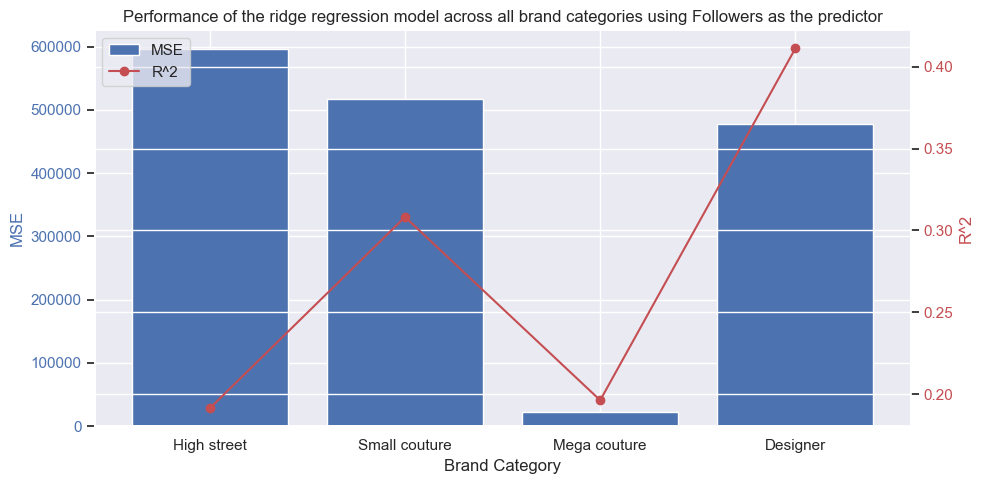

In [48]:
df = pd.read_csv('fashiondata.csv')
df.columns = df.columns.str.strip()

brandcategories = ['High street', 'Small couture', 'Mega couture', 'Designer']
model_performance = {}

categories = []
mse_values = []
r2_values = []

for category in brandcategories:
    print(f"\nBrand category: {category}")
    brandcategory_data = df[df['BrandCategory'] == category]
    predictors = ['Followers']

    print(f"Predictors used for {category}: {predictors}")

    X = brandcategory_data[predictors]
    y = brandcategory_data['Likes']

    if not X.empty:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        model = Ridge(alpha=1.0)
        model.fit(X_train_scaled, y_train)

        y_pred = model.predict(X_test_scaled)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        model_performance[category] = {'MSE': mse, 'R^2': r2}
        print(f"MSE for {category}: {mse}")
        print(f"R^2 for {category}: {r2}")
        categories.append(category)
        mse_values.append(mse)
        r2_values.append(r2)

# Plotting the graph
fig, ax1 = plt.subplots(figsize=(10, 5))

if categories:
    mse_bars = ax1.bar(categories, mse_values, color='b', label='MSE')
    ax1.set_xlabel('Brand Category')
    ax1.set_ylabel('MSE', color='b')
    ax1.tick_params(axis='y', labelcolor='b')

    ax2 = ax1.twinx()
    r2_lines = ax2.plot(categories, r2_values, color='r', marker='o', label='R^2')
    ax2.set_ylabel('R^2', color='r')
    ax2.tick_params(axis='y', labelcolor='r')

    plt.title('Performance of the ridge regression model across all brand categories using Followers as the predictor')
    fig.tight_layout()
    plt.legend([mse_bars, r2_lines[0]], ['MSE', 'R^2'], loc='upper left')
    plt.show()
else:
    print("")

Now, we execute a ridge regression model for Comments and Likes for each brand category


Brand category: High street
Predictors used for High street: ['Comments']
MSE for High street: 423462.77470423316
R^2 for High street: 0.4252122417126153

Brand category: Small couture
Predictors used for Small couture: ['Comments']
MSE for Small couture: 476357.54408019385
R^2 for Small couture: 0.36336693010394083

Brand category: Mega couture
Predictors used for Mega couture: ['Comments']
MSE for Mega couture: 17837.109711382473
R^2 for Mega couture: 0.37893011325443915

Brand category: Designer
Predictors used for Designer: ['Comments']
MSE for Designer: 1162104.0943137114
R^2 for Designer: -0.43490368425225623


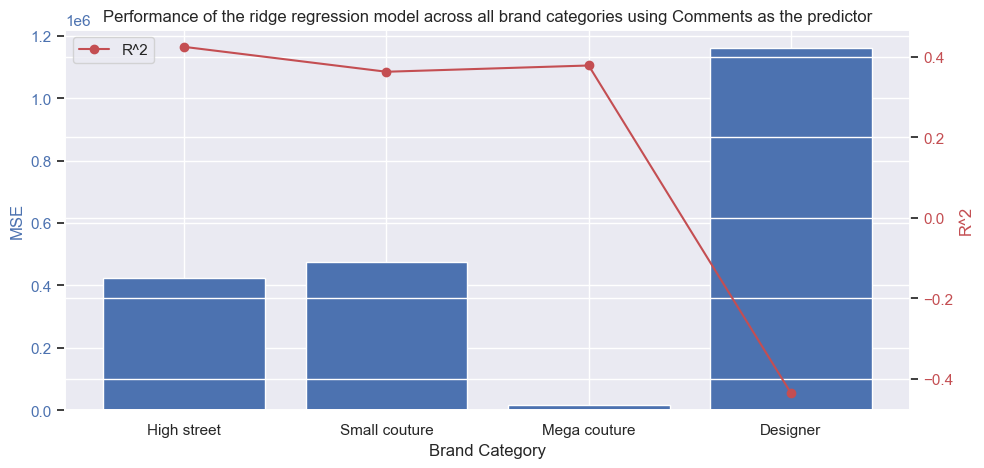

In [49]:
brand_categories = ['High street', 'Small couture', 'Mega couture', 'Designer']
model_performance = {}

# Strip any leading/trailing whitespace from column names
df.columns = df.columns.str.strip()

categories = []
mse_values = []
r2_values = []

for category in brand_categories:
    print(f"\nBrand category: {category}")
    brand_category_data = df[df['BrandCategory'] == category]

    # Set initial predictors and adjust based on column availability
    predictors = []
    if 'Comments' in brand_category_data.columns:
        predictors.append('Comments')

    if predictors:
        print(f"Predictors used for {category}: {predictors}")

        X = brand_category_data[predictors]
        y = brand_category_data['Likes']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        model = Ridge(alpha=1.0)
        model.fit(X_train_scaled, y_train)

        y_pred = model.predict(X_test_scaled)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        model_performance[category] = {'MSE': mse, 'R^2': r2}
        print(f"MSE for {category}: {mse}")
        print(f"R^2 for {category}: {r2}")
        
        categories.append(category)
        mse_values.append(mse)
        r2_values.append(r2)
    else:
        print(f"No predictors for {category}")

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 5))

# MSE plot
mse_bars = ax1.bar(categories, mse_values, color='b', label='MSE')
ax1.set_xlabel('Brand Category')
ax1.set_ylabel('MSE', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# R^2 plot with a secondary y-axis
ax2 = ax1.twinx()
r2_lines = ax2.plot(categories, r2_values, color='r', marker='o', label='R^2')
ax2.set_ylabel('R^2', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Performance of the ridge regression model across all brand categories using Comments as the predictor')
fig.tight_layout()

plt.legend(loc='upper left')
plt.show()

----

## Lasso Regression Models

Here, we execute a lasso regression model for Followers and Likes for each brand category


Brand category: High street
Predictors used for High street: ['Followers']
MSE for High street: 595191.2364758046
R^2 for High street: 0.19211638660524633

Brand category: Small couture
Predictors used for Small couture: ['Followers']
MSE for Small couture: 517649.27499278414
R^2 for Small couture: 0.30818216030468504

Brand category: Mega couture
Predictors used for Mega couture: ['Followers']
MSE for Mega couture: 22912.789904315116
R^2 for Mega couture: 0.20220012876767346

Brand category: Designer
Predictors used for Designer: ['Followers']
MSE for Designer: 476829.33515517996
R^2 for Designer: 0.41123676173107104


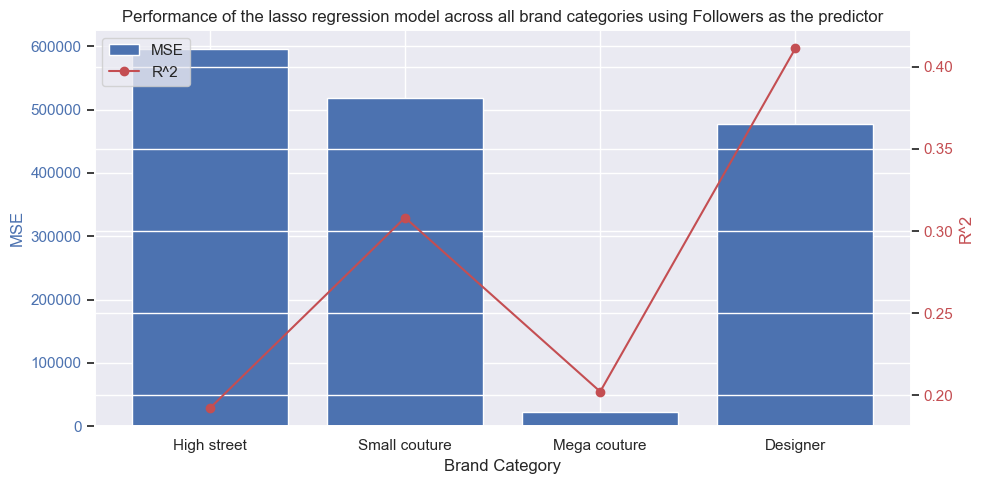

In [50]:
from sklearn.linear_model import Lasso 

df = pd.read_csv('fashiondata.csv')
df.columns = df.columns.str.strip()

brandcategories = ['High street', 'Small couture', 'Mega couture', 'Designer']
model_performance = {}

categories = []
mse_values = []
r2_values = []

for category in brandcategories:
    print(f"\nBrand category: {category}")
    brandcategory_data = df[df['BrandCategory'] == category]
    predictors = ['Followers']

    print(f"Predictors used for {category}: {predictors}")

    X = brandcategory_data[predictors]
    y = brandcategory_data['Likes']

    if not X.empty:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        model = Lasso(alpha=1.0)
        model.fit(X_train_scaled, y_train)

        y_pred = model.predict(X_test_scaled)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        model_performance[category] = {'MSE': mse, 'R^2': r2}
        print(f"MSE for {category}: {mse}")
        print(f"R^2 for {category}: {r2}")
        categories.append(category)
        mse_values.append(mse)
        r2_values.append(r2)

# Plotting the graph
fig, ax1 = plt.subplots(figsize=(10, 5))

if categories:
    mse_bars = ax1.bar(categories, mse_values, color='b', label='MSE')
    ax1.set_xlabel('Brand Category')
    ax1.set_ylabel('MSE', color='b')
    ax1.tick_params(axis='y', labelcolor='b')

    ax2 = ax1.twinx()
    r2_lines = ax2.plot(categories, r2_values, color='r', marker='o', label='R^2')
    ax2.set_ylabel('R^2', color='r')
    ax2.tick_params(axis='y', labelcolor='r')

    plt.title('Performance of the lasso regression model across all brand categories using Followers as the predictor')
    fig.tight_layout()
    plt.legend([mse_bars, r2_lines[0]], ['MSE', 'R^2'], loc='upper left')
    plt.show()
else:
    print("")

Now, we perform a lasso regression model on Comments and Likes in each brand catgeory


Brand category: High street
Predictors used for High street: ['Comments']
MSE for High street: 424026.8063285295
R^2 for High street: 0.4244466526400955

Brand category: Small couture
Predictors used for Small couture: ['Comments']
MSE for Small couture: 476151.4508008274
R^2 for Small couture: 0.3636423656433976

Brand category: Mega couture
Predictors used for Mega couture: ['Comments']
MSE for Mega couture: 17778.655510084227
R^2 for Mega couture: 0.3809654286596552

Brand category: Designer
Predictors used for Designer: ['Comments']
MSE for Designer: 1156259.9688347327
R^2 for Designer: -0.4276876721737759


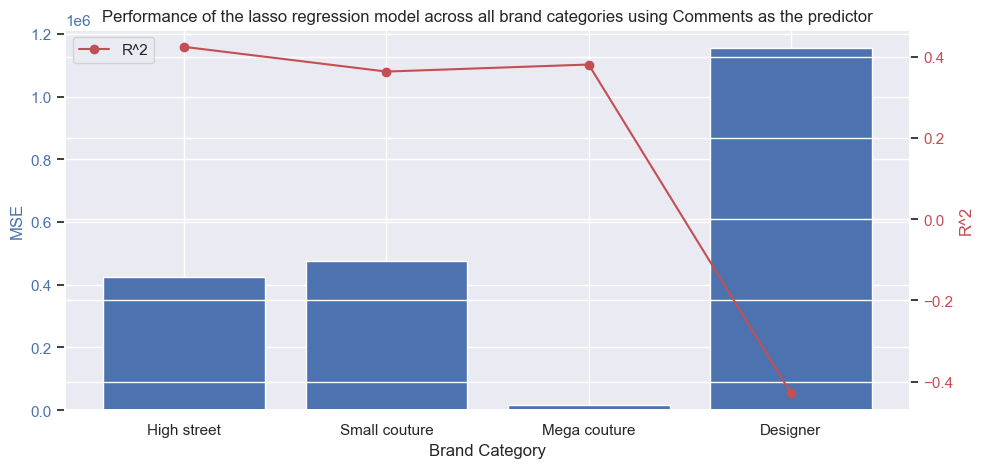

In [51]:
brand_categories = ['High street', 'Small couture', 'Mega couture', 'Designer']
model_performance = {}

# Strip any leading/trailing whitespace from column names
df.columns = df.columns.str.strip()

categories = []
mse_values = []
r2_values = []

for category in brand_categories:
    print(f"\nBrand category: {category}")
    brand_category_data = df[df['BrandCategory'] == category]

    # Set initial predictors and adjust based on column availability
    predictors = []
    if 'Comments' in brand_category_data.columns:
        predictors.append('Comments')

    if predictors:
        print(f"Predictors used for {category}: {predictors}")

        X = brand_category_data[predictors]
        y = brand_category_data['Likes']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        model = Lasso(alpha=1.0)
        model.fit(X_train_scaled, y_train)

        y_pred = model.predict(X_test_scaled)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        model_performance[category] = {'MSE': mse, 'R^2': r2}
        print(f"MSE for {category}: {mse}")
        print(f"R^2 for {category}: {r2}")
        
        categories.append(category)
        mse_values.append(mse)
        r2_values.append(r2)
    else:
        print(f"No predictors for {category}")

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 5))

# MSE plot
mse_bars = ax1.bar(categories, mse_values, color='b', label='MSE')
ax1.set_xlabel('Brand Category')
ax1.set_ylabel('MSE', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# R^2 plot with a secondary y-axis
ax2 = ax1.twinx()
r2_lines = ax2.plot(categories, r2_values, color='r', marker='o', label='R^2')
ax2.set_ylabel('R^2', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Performance of the lasso regression model across all brand categories using Comments as the predictor')
fig.tight_layout()

plt.legend(loc='upper left')
plt.show()

### Ridge regression

#### Highstreet:

> For the test dataset, under highstreet, the R^2 value obtained was 0.19150049530219848 for followers vs likes using the ridge regression. This R^2 value is significantly lower compared to the multivariate linear regression R^2 value found for normal linear regression which was 0.4474047498004078. This suggests the possibility of the variable other than followers used in the multivariate analysis which could have resulted in this high and improvised R^2 value. Furthermore, the R^2 value obtained for comments vs likes was 0.4252122417126153 which directly supports the multivariate R^2 value. Since the MSE values are very high (more than 4,00,000) for all the multivariate, ridge and lasso regressions, it can be ignored in our analysis.

#### Mega couture:

> A similar trend was visible in mega couture because the R^2 for followers using ridge was significantly low compared to comments using ridge(0.37893011325443915) which in turn was a little closer to the multivariate R^2 value of 0.47552076797088494.

#### Small couture:

> In small couture, the R^2 for followers using ridge was 0.30824797967780515 and for comments was 0.36336693010394083 which supported the multivariate regression R^2 value of 0.40414182908637275 mostly given their low disparity.

#### Designer:

> The results obtained for designer was particularly intriguing firstly because of the negative R^2 value in multivariate analysis which could signify over- or under-fitting if the data. The ridge regression on comments further suggests this by providing a negative R^2 value too. Interestingly, the value for followers is not only positive but also significantly high(0.4111959698459624) which suggests the dominance of followers in affecting the number of likes.

### Lasso regression

A very similar trend was observed using lasso regression as well when studied under all four brand cateories. Ofcourse, the R^2 were subject to slight changes that does not affect the overall idea or effect of followers and comments on the response variable likes. Particularly, for the designer brand category, comments using lasso provided a negative R^2 value again and followers gave a positive and really high R^2 value, both of these were similar to that of ridge regression.

In a nutshell, the insights obtained from the use of lasso regression was seen to be mostly similar and close to that obtained using ridge regression, proving the similarity of the models with respect to the dataset under study.

-----

## Conclusion: Analyses based on multiple models & bivariate exploration

By constructing bivariate explorations, we learned that Followers had a much stronger correlation to Likes than Comments did, but for most brand categories, correlations were still strong for both variables, proving their worth as reliable predictors for Likes and overall, to predict post popularity. Hence we then used multiple linear regression models for each brand category to expound on this and Designer stuck out as the R^2 values were negative implying the dataset was a poor fit for the linear regression model. For the other, R^2 values explained a subtantial portion of the dataset. In order to improve these values, we executed lasso & ridge regression models which yielded similar but mostly higher values. However, from all the linear regression models, we found that Comments was a better predictor than Followers, which indicated stronger correlations did not necessarily translate to being better predictors.